In [ ]:
import sys
import string
import re
import pandas as pd
from io import StringIO

def load_text(filename):
    with open(filename, 'r') as f:
        text = f.read()
    return text

data=load_text("output_chunk_4.csv")


# Convert the string data to a pandas DataFrame
data_io = StringIO(data)
df = pd.read_csv(data_io)

# Display the column labels
print(df.columns)
df['category'].unique()

Index(['category', 'text'], dtype='object')


array(['arts', 'crime', 'disaster', 'economy', 'education',
       'environmental', 'health', 'humanInterest', 'labour', 'lifestyle',
       'other', 'politics', 'religion', 'science', 'social', 'sport',
       'unrest', 'weather'], dtype=object)

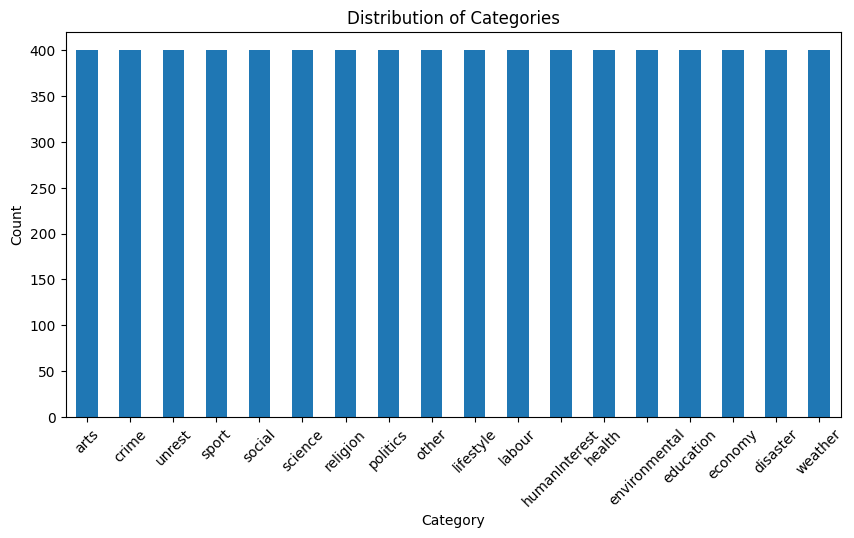

category
arts             400
crime            400
unrest           400
sport            400
social           400
science          400
religion         400
politics         400
other            400
lifestyle        400
labour           400
humanInterest    400
health           400
environmental    400
education        400
economy          400
disaster         400
weather          400
Name: count, dtype: int64

In [ ]:
# Check the distribution of categories
category_counts = df['category'].value_counts()

# Display category distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar')
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Print category counts
category_counts

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


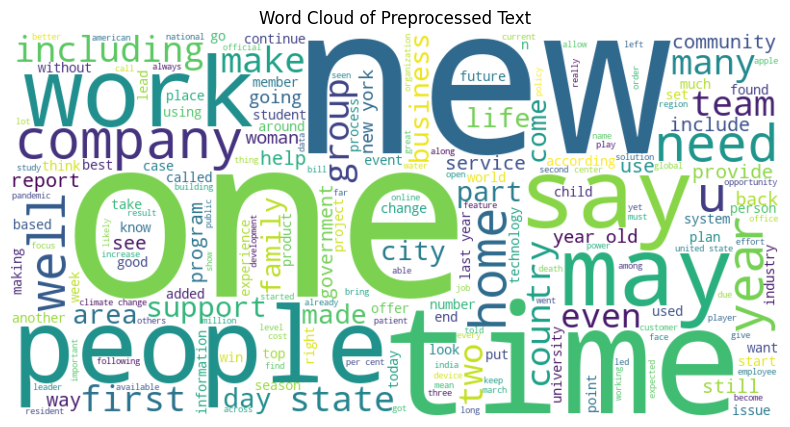

In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.add("said")

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]  # Lemmatization & Stopword removal
    return " ".join(words)

# Apply preprocessing to text column
df['clean_text'] = df['text'].apply(preprocess_text)

# Visualize word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Preprocessed Text")
plt.show()




In [ ]:
from collections import defaultdict
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure required nltk resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
default_stopwords = set(stopwords.words('english'))

# Step 1: Preprocess text (basic cleaning)
def basic_preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)
    return words

# Step 2: Identify words that appear in multiple categories
category_word_counts = defaultdict(set)

for _, row in df.iterrows():
    words = basic_preprocess(row['text'])
    for word in words:
        category_word_counts[word].add(row['category'])

# Set a threshold: Words appearing in more than 50% of categories are removed
threshold = len(df['category'].unique()) * 0.5
custom_stopwords = {word for word, categories in category_word_counts.items() if len(categories) > threshold}

# Merge with default stopwords
final_stopwords = default_stopwords.union(custom_stopwords)

# Step 3: Apply full preprocessing with the updated stopwords list
def preprocess_text(text):
    words = basic_preprocess(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in final_stopwords]
    return " ".join(words)

# Apply the new preprocessing function
df['clean_text'] = df['text'].apply(preprocess_text)

# Print custom stopwords that were removed
print(f"Custom stopwords identified and removed: {list(custom_stopwords)[:20]}")  # Show first 20


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Custom stopwords identified and removed: ['railway', 'extract', 'sticks', 'arc', 'tripled', 'aren', 'noah', 'spending', 'gaps', 'recruited', 'supremacy', 'writers', 'hottest', 'defining', 'as', 'yesterday', 'tricks', 'maker', 'just', 'ink']


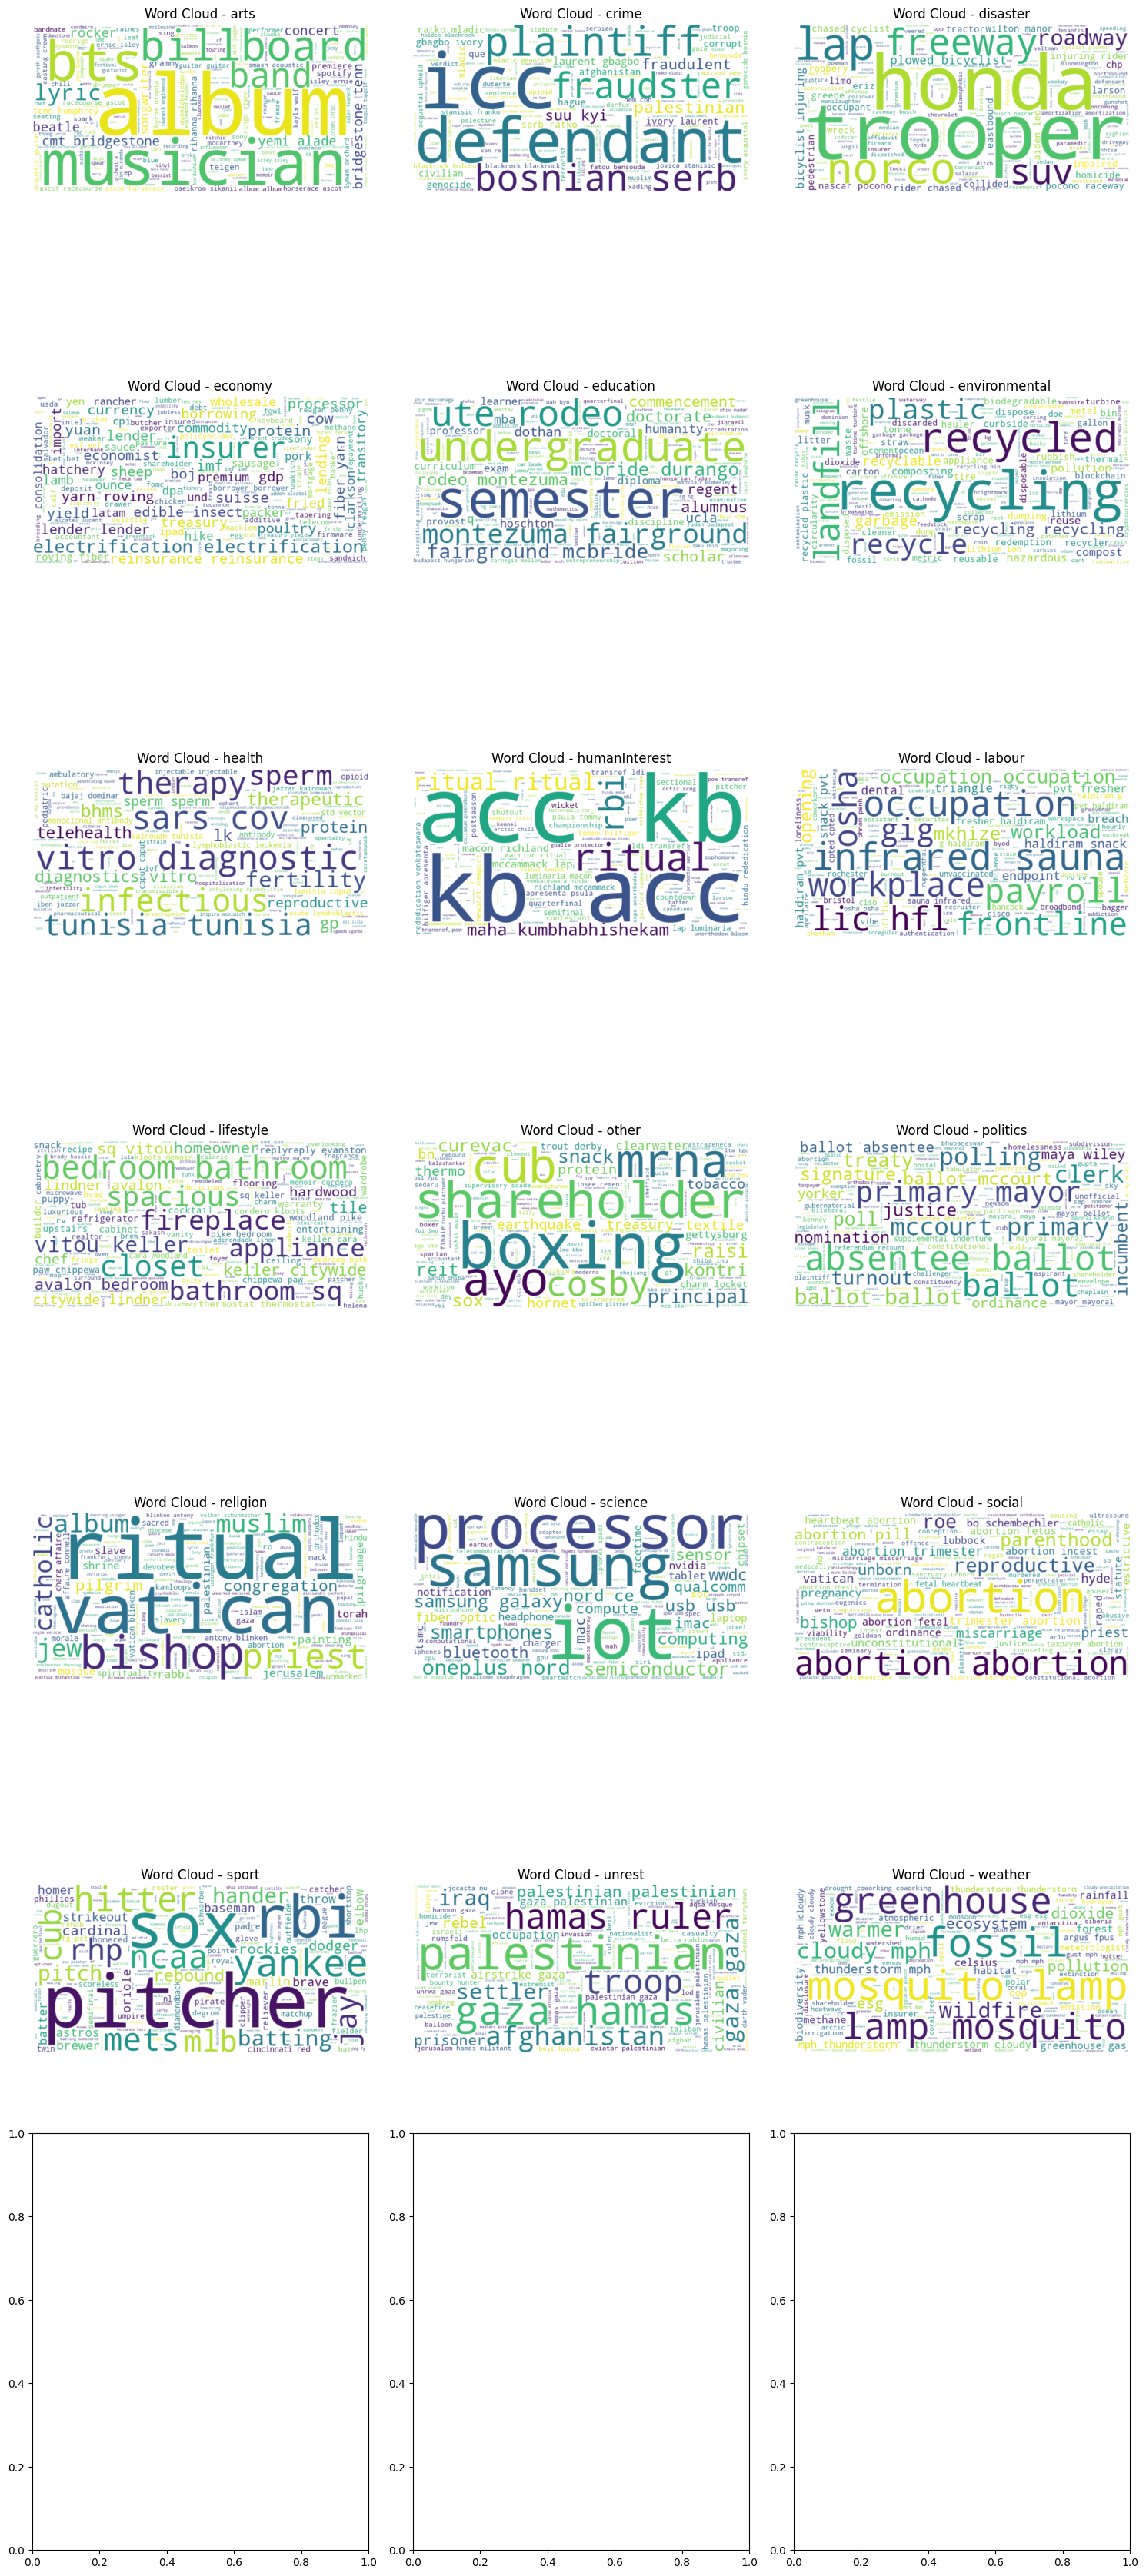

In [ ]:
# Generate word clouds by category
categories = df['category'].unique()

# Set up the figure
fig, axes = plt.subplots(nrows=len(categories)//3 + 1, ncols=3, figsize=(15, 5 * (len(categories)//3 + 1)))
axes = axes.flatten()

# Generate and plot word clouds for each category
for i, category in enumerate(categories):
    category_text = " ".join(df[df['category'] == category]['clean_text'])
    wordcloud = WordCloud(width=600, height=300, background_color="white").generate(category_text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Word Cloud - {category}")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Step 1: TF-IDF Vectorization (Unigrams + Bigrams, 5000 most important features)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Step 2: Dimensionality Reduction using Truncated SVD (LSA)
svd = TruncatedSVD(n_components=300)  # Reduce to 300 components
X_reduced = svd.fit_transform(X_tfidf)


In [ ]:
import numpy as np


In [ ]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Tokenize Text for Word2Vec Training
df["tokenized_text"] = df["clean_text"].apply(lambda x: x.split())

# Step 2: Train Word2Vec Model (100-dimensional vectors)
word2vec_model = Word2Vec(sentences=df["tokenized_text"], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(df["tokenized_text"], total_examples=len(df), epochs=10)

# Step 3: Convert Each Text to Word Embedding Average
def text_to_w2v_embedding(text):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(100)  # Return zero vector if no words are found
    return np.mean(word_vectors, axis=0)  # Average word vectors

# Apply transformation
X_w2v = np.array([text_to_w2v_embedding(text) for text in df["clean_text"]])

# Step 4: Stratified Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_w2v, df["category"], test_size=0.2, random_state=42, stratify=df["category"]
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_rf = grid_search.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

# Step 6: Evaluate on Validation Set
y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy after Word2Vec + Tuning: {val_accuracy}")
print(classification_report(y_val, y_val_pred))

# Step 7: Final Test Set Evaluation
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Final Test Accuracy: {test_accuracy}")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   5.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   6.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   6.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   8.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   9.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   9.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  11.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  11.9s
[CV] END max_depth=None, m

/Users/amritaajaysagar/miniconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amritaajaysagar/miniconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amritaajaysagar/miniconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Compute TF-IDF weights
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])
tfidf_vocab = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

# Function to compute TF-IDF weighted embeddings
def text_to_tfidf_w2v_embedding(text):
    words = text.split()
    word_vectors = []
    word_weights = []

    for word in words:
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word] * tfidf_vocab.get(word, 1))
            word_weights.append(tfidf_vocab.get(word, 1))

    if len(word_vectors) == 0:
        return np.zeros(100)  # If no words in text, return a zero vector

    return np.sum(word_vectors, axis=0) / np.sum(word_weights)

# Apply transformation
X_tfidf_w2v = np.array([text_to_tfidf_w2v_embedding(text) for text in df["clean_text"]])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as numbers
label_encoder = LabelEncoder()
df["category_encoded"] = label_encoder.fit_transform(df["category"])  # Encode categories

# Use encoded labels for training
y = df["category_encoded"]


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_tfidf_w2v, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb = XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = xgb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.49228395061728397
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        72
           1       0.51      0.50      0.51        72
           2       0.42      0.50      0.46        72
           3       0.41      0.31      0.35        72
           4       0.38      0.35      0.36        72
           5       0.72      0.76      0.74        72
           6       0.47      0.49      0.48        72
           7       0.35      0.32      0.34        72
           8       0.25      0.19      0.22        72
           9       0.35      0.39      0.37        72
          10       0.10      0.07      0.08        72
          11       0.56      0.53      0.54        72
          12       0.45      0.46      0.46        72
          13       0.64      0.74      0.68        72
          14       0.67      0.54      0.60        72
          15       0.69      0.82      0.75        72
          16       0.47      0.54      0

In [ ]:
from collections import Counter

# Function to extract top N words per category
def get_top_words_by_category(df, category_column, text_column, top_n=10):
    category_word_freq = {}

    for category in df[category_column].unique():
        text = " ".join(df[df[category_column] == category][text_column])
        words = text.split()
        word_counts = Counter(words)
        top_words = [word for word, _ in word_counts.most_common(top_n)]
        category_word_freq[category] = top_words

    return category_word_freq

# Extract top words per category
top_words_by_category = get_top_words_by_category(df, "category", "clean_text")

# Print the most frequent words per category
for category, words in top_words_by_category.items():
    print(f"{category}: {words}")


arts: ['album', 'guitar', 'musician', 'cmt', 'bts', 'rihanna', 'ascot', 'isley', 'mccartney', 'lyric']
crime: ['mladic', 'bosnian', 'serb', 'plaintiff', 'gbagbo', 'genocide', 'icc', 'bosnia', 'defendant', 'hague']
disaster: ['rider', 'cyclist', 'eriz', 'trooper', 'freeway', 'injuring', 'busch', 'honda', 'bicyclist', 'scooter']
economy: ['lender', 'electrification', 'borrower', 'imf', 'insurer', 'treasury', 'sheep', 'reinsurance', 'suisse', 'insect']
education: ['semester', 'undergraduate', 'mba', 'ute', 'bitchute', 'doctorate', 'rodeo', 'montezuma', 'fairground', 'mcbride']
environmental: ['recycling', 'recycled', 'landfill', 'plastic', 'garbage', 'recycle', 'offshore', 'hazardous', 'compost', 'pollution']
health: ['sperm', 'vitro', 'std', 'tunisia', 'therapy', 'diagnostics', 'cov', 'reproductive', 'sars', 'antibody']
humanInterest: ['acc', 'kb', 'ritual', 'lap', 'rbi', 'hindu', 'semifinal', 'venkateswara', 'maha', 'transref']
labour: ['occupation', 'haldiram', 'osha', 'hancock', 'saun

In [ ]:
import numpy as np

# Function to create rule-based features
def create_rule_based_features(text, top_words_by_category):
    feature_vector = np.zeros(len(top_words_by_category))  # One feature per category
    words = set(text.split())  # Unique words in the text

    for idx, (category, top_words) in enumerate(top_words_by_category.items()):
        if any(word in words for word in top_words):  # If a top word is present
            feature_vector[idx] = 1  # Mark feature as present

    return feature_vector

# Apply the function to create features
rule_based_features = np.array([create_rule_based_features(text, top_words_by_category) for text in df["clean_text"]])


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure y is correctly encoded
y = label_encoder.fit_transform(df["category"])

# Redo the split using the updated feature set
X_train, X_temp, y_train, y_temp = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

# Print shapes to confirm consistency
print("Train shape:", X_train.shape, "Test shape:", X_test.shape, "Val shape:", X_val.shape)


Train shape: (5760, 118) Test shape: (144, 118) Val shape: (1296, 118)


In [ ]:
# Compute TF-IDF weights
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])
tfidf_vocab = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

# Function to compute TF-IDF weighted word embeddings
def text_to_tfidf_w2v_embedding(text):
    words = text.split()
    word_vectors = []
    word_weights = []

    for word in words:
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word] * tfidf_vocab.get(word, 1))
            word_weights.append(tfidf_vocab.get(word, 1))

    if len(word_vectors) == 0:
        return np.zeros(100)  # If no words in text, return a zero vector

    return np.sum(word_vectors, axis=0) / np.sum(word_weights)

# Apply transformation
X_w2v = np.array([text_to_tfidf_w2v_embedding(text) for text in df["clean_text"]])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize rule-based features
scaler = StandardScaler()
rule_based_features_scaled = scaler.fit_transform(rule_based_features)

# Concatenate rule-based features with embeddings
X_combined = np.hstack([X_w2v, rule_based_features_scaled])  # OR use X_w2v instead of X_bert



In [ ]:
from sklearn.model_selection import train_test_split

# Encode labels
y = label_encoder.fit_transform(df["category"])

# Redo the train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

# Print shapes to verify consistency
print("Train shape:", X_train.shape, "Val shape:", X_val.shape, "Test shape:", X_test.shape)


Train shape: (5760, 118) Val shape: (1296, 118) Test shape: (144, 118)


In [ ]:
# Train XGBoost
xgb = XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = xgb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))



Validation Accuracy: 0.5108024691358025
               precision    recall  f1-score   support

         arts       0.49      0.60      0.54        72
        crime       0.56      0.49      0.52        72
     disaster       0.48      0.57      0.52        72
      economy       0.44      0.33      0.38        72
    education       0.42      0.42      0.42        72
environmental       0.73      0.82      0.77        72
       health       0.49      0.51      0.50        72
humanInterest       0.35      0.29      0.32        72
       labour       0.25      0.24      0.24        72
    lifestyle       0.35      0.39      0.37        72
        other       0.13      0.10      0.11        72
     politics       0.62      0.56      0.59        72
     religion       0.54      0.50      0.52        72
      science       0.64      0.76      0.70        72
       social       0.69      0.53      0.60        72
        sport       0.69      0.78      0.73        72
       unrest       0.51

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sentence_transformers import SentenceTransformer

# Ensure required NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load Data (Modify file path as needed)
df = pd.read_csv("output_chunk_4.csv")

# Initialize necessary NLP tools
lemmatizer = nltk.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

# --------------------- Step 1: Text Preprocessing ---------------------
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

df["clean_text"] = df["text"].apply(preprocess_text)

# --------------------- Step 2: Extract Most Frequent Words per Category ---------------------
def get_top_words_by_category(df, category_column, text_column, top_n=10):
    category_word_freq = {}

    for category in df[category_column].unique():
        text = " ".join(df[df[category_column] == category][text_column])
        words = text.split()
        word_counts = Counter(words)
        top_words = [word for word, _ in word_counts.most_common(top_n)]
        category_word_freq[category] = top_words

    return category_word_freq

top_words_by_category = get_top_words_by_category(df, "category", "clean_text", top_n=10)

# --------------------- Step 3: Create Rule-Based Feature Matrix ---------------------
def create_rule_based_features(text, top_words_by_category):
    feature_vector = np.zeros(len(top_words_by_category))  # One feature per category
    words = set(text.split())  # Unique words in the text

    for idx, (category, top_words) in enumerate(top_words_by_category.items()):
        if any(word in words for word in top_words):  # If a top word is present
            feature_vector[idx] = 1  # Mark feature as present

    return feature_vector

# Generate rule-based features
rule_based_features = np.array([create_rule_based_features(text, top_words_by_category) for text in df["clean_text"]])

# Standardize rule-based features
scaler = StandardScaler()
rule_based_features_scaled = scaler.fit_transform(rule_based_features)

# --------------------- Step 4: Convert Text into BERT Embeddings ---------------------
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_bert = np.array(bert_model.encode(df["clean_text"], show_progress_bar=True))

# Combine BERT embeddings with rule-based features
X_combined = np.hstack([X_bert, rule_based_features_scaled])

# --------------------- Step 5: Train-Test Split ---------------------
# Encode labels
label_encoder = LabelEncoder()
df["category_encoded"] = label_encoder.fit_transform(df["category"])
y = df["category_encoded"]

# Split dataset (80% train, 18% validation, 2% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

# Print shapes to verify consistency
print("Train shape:", X_train.shape, "Val shape:", X_val.shape, "Test shape:", X_test.shape)

# --------------------- Step 6: Train XGBoost Classifier ---------------------
xgb = XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1)
xgb.fit(X_train, y_train)

# --------------------- Step 7: Evaluate Model Performance ---------------------
# Validation Performance
y_val_pred = xgb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

# Test Performance
y_test_pred = xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Batches: 100%|██████████| 225/225 [00:18<00:00, 12.08it/s]


Train shape: (5760, 402) Val shape: (1296, 402) Test shape: (144, 402)
Validation Accuracy: 0.6358024691358025
               precision    recall  f1-score   support

         arts       0.58      0.61      0.59        72
        crime       0.68      0.67      0.67        72
     disaster       0.64      0.75      0.69        72
      economy       0.51      0.57      0.54        72
    education       0.80      0.76      0.78        72
environmental       0.79      0.81      0.80        72
       health       0.66      0.72      0.69        72
humanInterest       0.54      0.46      0.50        72
       labour       0.67      0.65      0.66        72
    lifestyle       0.56      0.57      0.57        72
        other       0.13      0.06      0.08        72
     politics       0.73      0.71      0.72        72
     religion       0.47      0.44      0.46        72
      science       0.61      0.74      0.67        72
       social       0.77      0.64      0.70        72
        

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from gensim.models import Word2Vec
import optuna

# Ensure required NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load Data (Modify file path as needed)
df = pd.read_csv("output_chunk_4.csv")

# --------------------- Step 1: Data Cleaning ---------------------
lemmatizer = nltk.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

df["clean_text"] = df["text"].apply(preprocess_text)

# --------------------- Step 2: Fix "Other" Class Issues ---------------------
df = df[df["category"] != "other"]  # Remove "Other" category from training

# --------------------- Step 3: Data Augmentation (Synonym Replacement) ---------------------
from nltk.corpus import wordnet
import random

def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word = random.choice(words)
        synonyms = wordnet.synsets(word)
        if synonyms:
            new_word = synonyms[0].lemmas()[0].name()
            new_words.append(new_word)
    return " ".join(new_words)

df["augmented_text"] = df["clean_text"].apply(lambda x: synonym_replacement(x))

# --------------------- Step 4: Train Custom Word2Vec Model ---------------------
sentences = [text.split() for text in df["clean_text"]]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.save("word2vec_custom.model")

# --------------------- Step 5: Extract Most Frequent Words per Category ---------------------
def get_top_words_by_category(df, category_column, text_column, top_n=10):
    category_word_freq = {}
    for category in df[category_column].unique():
        text = " ".join(df[df[category_column] == category][text_column])
        words = text.split()
        word_counts = Counter(words)
        top_words = [word for word, _ in word_counts.most_common(top_n)]
        category_word_freq[category] = top_words
    return category_word_freq

top_words_by_category = get_top_words_by_category(df, "category", "clean_text", top_n=10)

# --------------------- Step 6: Create Rule-Based Feature Matrix ---------------------
def create_rule_based_features(text, top_words_by_category):
    feature_vector = np.zeros(len(top_words_by_category))
    words = set(text.split())
    for idx, (category, top_words) in enumerate(top_words_by_category.items()):
        if any(word in words for word in top_words):
            feature_vector[idx] = 1
    return feature_vector

rule_based_features = np.array([create_rule_based_features(text, top_words_by_category) for text in df["clean_text"]])
scaler = StandardScaler()
rule_based_features_scaled = scaler.fit_transform(rule_based_features)

# --------------------- Step 7: Convert Text into Word2Vec Embeddings ---------------------
def text_to_w2v_embedding(text):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

X_w2v = np.array([text_to_w2v_embedding(text) for text in df["clean_text"]])

# Combine Word2Vec embeddings with rule-based features
X_combined = np.hstack([X_w2v, rule_based_features_scaled])

# --------------------- Step 8: Train-Test Split ---------------------
label_encoder = LabelEncoder()
df["category_encoded"] = label_encoder.fit_transform(df["category"])
y = df["category_encoded"]

X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

print("Train shape:", X_train.shape, "Val shape:", X_val.shape, "Test shape:", X_test.shape)

# --------------------- Step 9: Optimize XGBoost Hyperparameters ---------------------
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 700, step=100),
        'max_depth': trial.suggest_int('max_depth', 10, 30, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    return accuracy_score(y_val, model.predict(X_val))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_params = study.best_trial.params
print("Best parameters:", best_params)

# --------------------- Step 10: Train Stacked Model (XGBoost + SVM + Logistic Regression) ---------------------
base_models = [
    ('lr', LogisticRegression(max_iter=500)),
    ('svm', SVC(probability=True)),
    ('xgb', XGBClassifier(**best_params))
]

stacked_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())
stacked_model.fit(X_train, y_train)

# --------------------- Step 11: Evaluate Model Performance ---------------------
y_val_pred = stacked_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

y_test_pred = stacked_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[I 2025-02-22 14:01:28,907] A new study created in memory with name: no-name-785f328c-9b87-4c96-98d0-42943e2e12f3


Train shape: (5440, 117) Val shape: (1224, 117) Test shape: (136, 117)


[I 2025-02-22 14:01:32,773] Trial 0 finished with value: 0.6552287581699346 and parameters: {'n_estimators': 400, 'max_depth': 12, 'learning_rate': 0.29231437080200673, 'subsample': 0.8337758331332251, 'colsample_bytree': 0.6563445599450997}. Best is trial 0 with value: 0.6552287581699346.
[I 2025-02-22 14:01:35,565] Trial 1 finished with value: 0.6683006535947712 and parameters: {'n_estimators': 200, 'max_depth': 26, 'learning_rate': 0.290066091663833, 'subsample': 0.6231931581330957, 'colsample_bytree': 0.8929818398980844}. Best is trial 1 with value: 0.6683006535947712.
[I 2025-02-22 14:01:44,390] Trial 2 finished with value: 0.6740196078431373 and parameters: {'n_estimators': 500, 'max_depth': 28, 'learning_rate': 0.08395001947138153, 'subsample': 0.6755853083045322, 'colsample_bytree': 0.8108699959439822}. Best is trial 2 with value: 0.6740196078431373.
[I 2025-02-22 14:01:52,843] Trial 3 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 400, 'max_depth': 26

Best parameters: {'n_estimators': 500, 'max_depth': 28, 'learning_rate': 0.08395001947138153, 'subsample': 0.6755853083045322, 'colsample_bytree': 0.8108699959439822}
Validation Accuracy: 0.6658496732026143
               precision    recall  f1-score   support

         arts       0.53      0.57      0.55        72
        crime       0.71      0.72      0.72        72
     disaster       0.67      0.76      0.71        72
      economy       0.58      0.58      0.58        72
    education       0.89      0.86      0.87        72
environmental       0.79      0.72      0.75        72
       health       0.69      0.64      0.66        72
humanInterest       0.46      0.44      0.45        72
       labour       0.71      0.78      0.74        72
    lifestyle       0.65      0.83      0.73        72
     politics       0.70      0.56      0.62        72
     religion       0.38      0.40      0.39        72
      science       0.71      0.79      0.75        72
       social       0.

In [ ]:
%pip install numpy pandas nltk scikit-learn xgboost imbalanced-learn gensim sentence-transformers optuna deep-translator tensorflow

import numpy as np
import pandas as pd
import re
import string
import nltk
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import optuna
from deep_translator import GoogleTranslator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Ensure required NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load Data (Modify file path as needed)
df = pd.read_csv("output_chunk_4.csv")

# --------------------- Step 1: Data Cleaning ---------------------
lemmatizer = nltk.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

df["clean_text"] = df["text"].apply(preprocess_text)

# --------------------- Step 2: Fix "Other" Class Issues ---------------------
df = df[df["category"] != "other"]  # Remove "Other" category from training

# --------------------- Step 3: Data Augmentation (Back-Translation) ---------------------
def back_translate(text, lang="fr"):
    if len(text) < 5 or len(text) > 500:  # Adjust length range as needed
        return text  # Return original text if too short or too long
    try:
        translated = GoogleTranslator(source="en", target=lang).translate(text)
        return GoogleTranslator(source=lang, target="en").translate(translated)
    except Exception as e:
        print(f"Error in translation: {e}")
        return text  # Return original text on error

df["augmented_text"] = df["clean_text"].apply(lambda x: back_translate(x))

# --------------------- Step 4: Use BERT Embeddings ---------------------
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert text to BERT embeddings
X_bert = np.array(bert_model.encode(df["clean_text"].tolist()))

# --------------------- Step 5: Extract Most Frequent Words per Category ---------------------
def get_top_words_by_category(df, category_column, text_column, top_n=10):
    category_word_freq = {}
    for category in df[category_column].unique():
        text = " ".join(df[df[category_column] == category][text_column])
        words = text.split()
        word_counts = Counter(words)
        top_words = [word for word, _ in word_counts.most_common(top_n)]
        category_word_freq[category] = top_words
    return category_word_freq

top_words_by_category = get_top_words_by_category(df, "category", "clean_text", top_n=10)

# --------------------- Step 6: Create Rule-Based Feature Matrix ---------------------
def create_rule_based_features(text, top_words_by_category):
    feature_vector = np.zeros(len(top_words_by_category))
    words = set(text.split())
    for idx, (category, top_words) in enumerate(top_words_by_category.items()):
        if any(word in words for word in top_words):
            feature_vector[idx] = 1
    return feature_vector

rule_based_features = np.array([create_rule_based_features(text, top_words_by_category) for text in df["clean_text"]])


scaler = MinMaxScaler()
rule_based_features_scaled = scaler.fit_transform(rule_based_features)

# --------------------- Step 7: Combine Features ---------------------
X_combined = np.hstack([X_bert, rule_based_features_scaled])

# --------------------- Step 8: Train-Test Split ---------------------
label_encoder = LabelEncoder()
df["category_encoded"] = label_encoder.fit_transform(df["category"])
y = df["category_encoded"]

X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

print("Train shape:", X_train.shape, "Val shape:", X_val.shape, "Test shape:", X_test.shape)

# --------------------- Step 9: Balance Dataset Using SMOTE ---------------------
smote = SMOTE(sampling_strategy="auto")
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# --------------------- Step 10: Optimize XGBoost Hyperparameters ---------------------
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 700, step=100),
        'max_depth': trial.suggest_int('max_depth', 10, 30, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }
    model = XGBClassifier(**params)
    model.fit(X_train_bal, y_train_bal)
    return accuracy_score(y_val, model.predict(X_val))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_params = study.best_trial.params
print("Best parameters:", best_params)



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[I 2025-02-22 19:03:09,775] A new study created in memory with name: no-name-bcd565bd-3321-4dba-8c5e-369c92714548


Train shape: (5440, 401) Val shape: (1224, 401) Test shape: (136, 401)


[I 2025-02-22 19:03:44,581] Trial 0 finished with value: 0.6928104575163399 and parameters: {'n_estimators': 500, 'max_depth': 22, 'learning_rate': 0.079670321340739, 'subsample': 0.7862977373432646, 'colsample_bytree': 0.9449084987142872}. Best is trial 0 with value: 0.6928104575163399.
[I 2025-02-22 19:03:54,463] Trial 1 finished with value: 0.696078431372549 and parameters: {'n_estimators': 200, 'max_depth': 22, 'learning_rate': 0.21930942009967366, 'subsample': 0.6088468286453749, 'colsample_bytree': 0.7698815841375216}. Best is trial 1 with value: 0.696078431372549.
[I 2025-02-22 19:04:11,596] Trial 2 finished with value: 0.6911764705882353 and parameters: {'n_estimators': 700, 'max_depth': 20, 'learning_rate': 0.21434538920095764, 'subsample': 0.8087870116317384, 'colsample_bytree': 0.9195970868844979}. Best is trial 1 with value: 0.696078431372549.
[I 2025-02-22 19:04:29,132] Trial 3 finished with value: 0.6895424836601307 and parameters: {'n_estimators': 300, 'max_depth': 26, '

Best parameters: {'n_estimators': 400, 'max_depth': 12, 'learning_rate': 0.09572274757846977, 'subsample': 0.9450539345810345, 'colsample_bytree': 0.7218163868646225}


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

# Define base models
base_models = [
    ('lr', LogisticRegression(max_iter=500)),  # Logistic Regression
    ('svm', SVC(probability=True)),  # Support Vector Machine
    ('xgb', XGBClassifier(**best_params))  # XGBoost (Best tuned params)
]

# Define final estimator (XGBoost)
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=XGBClassifier(**best_params)
)

# Fit the stacked model
stacked_model.fit(X_train_bal, y_train_bal)

# Evaluate the stacked model
y_val_pred = stacked_model.predict(X_val)
y_test_pred = stacked_model.predict(X_test)

# Print evaluation results
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Validation Accuracy: 0.7099673202614379
               precision    recall  f1-score   support

         arts       0.66      0.65      0.66        72
        crime       0.83      0.74      0.78        72
     disaster       0.76      0.82      0.79        72
      economy       0.69      0.65      0.67        72
    education       0.81      0.78      0.79        72
environmental       0.80      0.82      0.81        72
       health       0.75      0.67      0.71        72
humanInterest       0.56      0.60      0.58        72
       labour       0.61      0.64      0.62        72
    lifestyle       0.59      0.69      0.64        72
     politics       0.73      0.62      0.67        72
     religion       0.52      0.39      0.44        72
      science       0.73      0.85      0.78        72
       social       0.74      0.71      0.72        72
        sport       0.76      0.90      0.83        72
       unrest       0.69      0.68      0.69        72
      weather       0.85

  category                                               text
0     arts  lewis capaldi is a fan of the vamps. the someo...
1     arts  on april 14 2016 exactly one week before he di...
2     arts  winston marshall is leaving mumford sons. wins...
3     arts  jones entertainment group president brad jones...
4     arts  vancouver bc cnw nickel rock resources inc. th... 

Unique categories: ['arts' 'crime' 'disaster' 'economy' 'education' 'environmental' 'health'
 'humanInterest' 'labour' 'lifestyle' 'other' 'politics' 'religion'
 'science' 'social' 'sport' 'unrest' 'weather']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amritaajaysagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


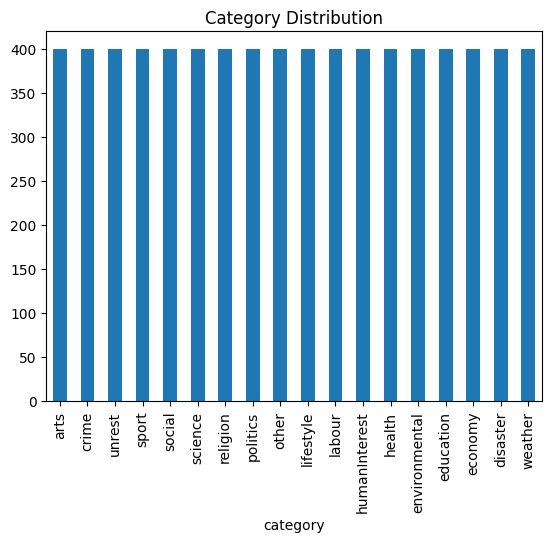

In [ ]:
# ------------------- Step 1: Import Required Libraries -------------------
import string
import re
import nltk
import numpy as np
import pandas as pd
import optuna
from collections import defaultdict
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from deep_translator import GoogleTranslator
import warnings

warnings.filterwarnings("ignore")

# ------------------- Step 2: Load and Explore Data -------------------
df = pd.read_csv("output_chunk_4.csv")  # Change to actual file path

# Display dataset info
print(df.head(), "\n")
print("Unique categories:", df["category"].unique())

# Check class distribution
category_counts = df["category"].value_counts()
category_counts.plot(kind="bar", title="Category Distribution")

# ------------------- Step 3: Text Preprocessing -------------------
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Identify frequently occurring words across multiple categories
def find_common_words(df):
    category_word_counts = defaultdict(set)
    for _, row in df.iterrows():
        words = word_tokenize(row["text"].lower())
        for word in words:
            category_word_counts[word].add(row["category"])
    threshold = len(df["category"].unique()) * 0.5
    return {word for word, categories in category_word_counts.items() if len(categories) > threshold}

common_words = find_common_words(df)
stop_words.update(common_words)

# Text Cleaning Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(preprocess_text)

# ------------------- Step 4: Data Augmentation (Synonym Replacement) -------------------
def synonym_replace(text):
    words = text.split()
    new_text = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            new_text.append(synonyms[0].lemmas()[0].name())
        else:
            new_text.append(word)
    return " ".join(new_text)

df["augmented_text"] = df["clean_text"].apply(synonym_replace)

# ------------------- Step 5: Feature Engineering (TF-IDF Bigrams) -------------------
vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Using bigrams
X_tfidf = vectorizer.fit_transform(df["clean_text"])

# ------------------- Step 6: Encode Labels -------------------
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["category"])

In [ ]:
# ------------------- Step 7: Train-Test Split (Stratified) -------------------
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=42)

print(f"Train shape: {X_train.shape} Val shape: {X_val.shape} Test shape: {X_test.shape}")

# ------------------- Step 8: Compute Class Weights -------------------
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# ------------------- Step 9: Optimize XGBoost with Optuna -------------------
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 600, step=100),
        "max_depth": trial.suggest_int("max_depth", 10, 30, step=2),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "scale_pos_weight": class_weight_dict[max(class_weight_dict, key=class_weight_dict.get)],  # Handle class imbalance
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    return accuracy_score(y_val, val_preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

best_params = study.best_params
print("Best parameters:", best_params)

# ------------------- Step 10: Train Stacked Model -------------------
base_models = [
    ("svm", SVC(probability=True)),
    ("xgb", XGBClassifier(**best_params)),
    ("nb", MultinomialNB())  # Now works with MinMaxScaler!
]

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=XGBClassifier(**best_params)  # XGBoost as final classifier
)

stacked_model.fit(X_train, y_train)

# ------------------- Step 11: Evaluate Model -------------------
y_val_pred = stacked_model.predict(X_val)
y_test_pred = stacked_model.predict(X_test)

print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

[I 2025-02-22 19:19:05,408] A new study created in memory with name: no-name-4d749dff-b9ff-4faa-9b7f-648acc5c8a84


Train shape: (5760, 349056) Val shape: (1296, 349056) Test shape: (144, 349056)


[I 2025-02-22 19:22:32,858] Trial 0 finished with value: 0.5185185185185185 and parameters: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.041955096987184366, 'subsample': 0.9089354687594985, 'colsample_bytree': 0.8432167839607645}. Best is trial 0 with value: 0.5185185185185185.
[I 2025-02-22 19:26:02,511] Trial 1 finished with value: 0.5146604938271605 and parameters: {'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.2769463074685872, 'subsample': 0.9225598000117522, 'colsample_bytree': 0.75497602790083}. Best is trial 0 with value: 0.5185185185185185.
[I 2025-02-22 19:28:45,705] Trial 2 finished with value: 0.5092592592592593 and parameters: {'n_estimators': 200, 'max_depth': 22, 'learning_rate': 0.16643496472509262, 'subsample': 0.9131995860770431, 'colsample_bytree': 0.6271957602713701}. Best is trial 0 with value: 0.5185185185185185.
[I 2025-02-22 19:31:38,821] Trial 3 finished with value: 0.5277777777777778 and parameters: {'n_estimators': 200, 'max_depth': 16

Best parameters: {'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.04371121063288807, 'subsample': 0.9611668491036238, 'colsample_bytree': 0.7367625679569406}

Validation Accuracy: 0.595679012345679
               precision    recall  f1-score   support

         arts       0.53      0.65      0.59        72
        crime       0.70      0.64      0.67        72
     disaster       0.59      0.72      0.65        72
      economy       0.54      0.54      0.54        72
    education       0.57      0.65      0.61        72
environmental       0.77      0.79      0.78        72
       health       0.52      0.68      0.59        72
humanInterest       0.47      0.39      0.43        72
       labour       0.51      0.40      0.45        72
    lifestyle       0.42      0.43      0.43        72
        other       0.19      0.07      0.10        72
     politics       0.58      0.62      0.60        72
     religion       0.55      0.47      0.51        72
      science       0.